## <font color='darkblue'> ASTR 21100/31200

## <font color='darkblue'> Homework Assignment 3
    
## <font color='darkblue'> Approximating 1D functions using interpolation and regression
 
## <font color='darkblue'> undergraduate students (35 points)
    
### <font color='darkblue'> Distributed: Friday, April 15

### <font color='darkblue'> Due: Friday, Apr 22, 9pm

import packages needed by the codes below. Run this cell first before using these codes. 

In [4]:
import numpy as np

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

from codes.plotting import plot_prettier, plot_line_points

plot_prettier()

## <font color='darkblue'> Exercise 1 (15 points): developing a function for constructing a polynomial or spline approximation of a function of 1 variable $f(x)$ 
    
Notebooks [<tt>05_approximation_class</tt>](https://drive.google.com/file/d/1Pr_Eg9Ieg8Ex6Lv0OnlBfkF6EiLJBUEB/view?usp=sharing) and [<tt>06_spline_class</tt>](https://drive.google.com/file/d/11hGchHotP6aW5Ynp62GJto9Cwa3pA0oR/view?usp=sharing) contain a number of examples of how to do 1) polynomial interpolation, 2) polynomial regression, 3) spline interpolation, 4) spline regression. 

In this exercise your task is to assemble these example into a single "umbrella" function that could be used conveniently to construct any of these approximations. The goal is for your how to use the relevant functions and apply them to construct approximation. 
    
    

**Task 1a. (10 points)** Implement a function that constructs approximation using global polynomial or piecewise spline using input vector of training values and evaluate the approximation at an input set of test values of $x$. 

Below is a suggested format of the function. Examine the docstring (its header) for specifications for how the function should work. 

    def poly_fit(xtr, ftr,  method='polynomial', porder=None, s=0.):
        """
        function constructing an approximating polynomial for the input 
        vector of training values of the approximated function ftr, 
        tabulated at the vector of training points xtr and compute the values
        of constructed polynomial at the input vector of test values xt

        Parameters:
        -----------
        xtr, ftr: numpy arrays
                    vectors of training points and tabulated function values

        method: str
                defining the method to be used in construction of the polynomial
                'polynomial' construct approximating global polynomial 
                      if porder == xtr.size-1 construct interpolating polynomial 
                            using np.linalg.solve
                       if porder < xtr.size construct approximating polynomial 
                              using regression with np.polyfit
                'splint'  - construct interpolating spline using scipy.interpolate.inter1d
                'splreg'  - construct regression spline using scipy.interpolate.UnivariateSpline

        porder: int  - order of the approximating polynomial. 
                    for method='polynomial'  must be 0<=poly_order<=np.size(xtr) 
                               and determines the polynomial order
                    for method='splint' determines order of interpolating spline 
                                 and must be 0, 1, 2, or 3
                                which will correspond to option of interp1d 
                                 kind='zero', 'slinear', 'quadratic', or 'cubic'
                    for method='splreg' this parameter is ignored
        s: smoothing parameter for method='splreg', ignored for other methods 

        Returns:
        --------
        pfit: object that can be called with a vector of test x values to produce approximated function 
               ftest = pfit(xtest)
              (e.g., such object is returned by np.poly1d, np.interp1d, np.polyfit, scipy.interpolate.UnivariateSpline_

        """



**Task 1b. (5 points)** Test this function by constructing interpolating approximations of  $\sin(x)$ over $x\in[0,2\pi]$ using interpolating polynomial and spline and demonstrate that your function  produces expected results using plots of the approximation plotted as line and training points plotted as points (see notebooks above for examples of such plots). 


Test your function by constructing polynomial and spline approximations for the training values of the function given below using regression.  Try different order values and different $s$ values for the polynomial and spline regression. 


***Note:*** If you are familiar with classes, this is the case, where a class PolyFit would be useful instead of a function. So if you want to practice using classes, I encourage you to implement a class with similar capabilities instead of the function. 
If you need guidance with this, it will be provided. 

In [2]:
def ftrain(x, scale=0.5): 
    return 1.5*x + np.sin(x) + np.random.normal(scale=scale, size=np.size(x))


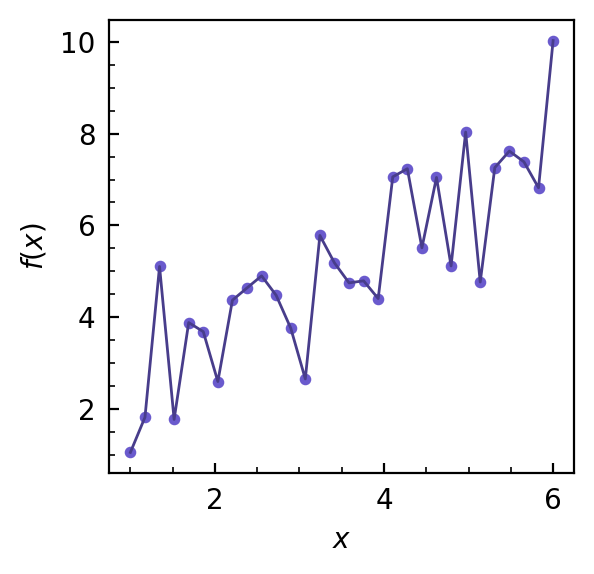

In [5]:
ntr = 30
xtr = np.linspace(1., 6., ntr)
ftr = ftrain(xtr, scale=1.)

plot_line_points(xtr, ftr, xp=xtr, yp=ftr, points=True, psize=40, 
                 xlabel=r'$x$', ylabel=r'$f(x)$', figsize=3)

**1c. (3 points)** Spline approximation can be used to get approximate inverse of a function: in other words instead of computing $f$ given $x$, we can compute $x$ given $f$. This works as long as $f$ is monotonic over the range where we construct approximation, because for non-monotonic function there may be $x(f)$ may be multi-valued. 

We can do this by constructing a spline approximation but using $f_{\rm train}$ values as first input to spline function and $x_{\rm train}$ as the second input. Construct such inverse spline approximation for $\arcsin x$ in the interval $x\in [0,\pi/2]$ in which $\sin x$ is monotonic. Test how well the approximation work for several $x$ values in that range and compare it to the value you get from <tt>np.arcsin</tt> function.

### <font color='blue'>Exercise 2: constructing approximation for age of the Universe as a function of redshift  (7 points)</font>

Age of the Universe at which the light of an object observed by us to have redshift $z$ was emitted is given by 


$$
t_U(z) = \frac{9.77814\times 10^{11}}{H_0}\,\int\limits_0^a \frac{da}{a\,[\Omega_{\rm m0}a^{-3} + (1-\Omega_{\rm m0}-\Omega_\Lambda)a^{-2} + \Omega_\Lambda]^{1/2}}\ \ \ {\rm yr},\ \ \ \ {\rm where}\  a=1/(1+z). 
$$
Here $H_0$ is the Hubble constant in km/s/Mpc.  

**Task 2a (7 points) Use the integration function you implemented in hw 2 or <tt>scipy.integrate.romberg</tt> function to compute $t(z)$ at a number of training values of $z$ over interval $z\in [0,2000]$. 

Use function your implemented in exercise 1 above to construct approximation using polynomial and spline interpolation for $t(z)$. Try even spacing of $z$ and Chebyshev spacing. 

Explore how fractional error changes with the number of training points using a set of test/validation $z$ values. What is the highest accuracy that you are able to get with polynomial or spline for $t_U(z)$ approximation and with how many training points? 

**Task 2b (3 points)** For a training values of $z$ and $t$, construct spline approximation for $z$ as a function of $t$ (i.e. spline approximation for $z(t)$). Test you function for several values of $t$ to get corresponding redshift $z$ and compare it to $t(z)$ you obtained above in 2a. 


### <font color='blue'>Exercise 3: regression approximation to the correlation of galaxy masses and rotation velocities (known as the Tully-Fisher relation)  (7 points)</font>



**Background.** Galaxies are large collections of gas and stars. Interstellar gas and stars in the "spiral" (aka "disk") galaxies like our Milky Way or [NGC 6384 galaxy](http://astrodvorek.cz/Pics/N6384_1n.jpg) rotates around the center with a velocity that is correlated with the total mass, $M$, of gas and stars in that galaxy. This relation is called the ["Tully-Fisher relation" (TFR)](https://en.wikipedia.org/wiki/Tully%E2%80%93Fisher_relation) in honor of the two astronomers, Brent Tully and Richard Fisher, who discovered it in 1977.   Our Sun, for example, is moving on a nearly circular orbit around the center of the Milky Way with the "***rotation velocity***" of $\approx 220$ km/sec. 

In this exercise you will examine this correlation in the form of logarithms of the mass and logarithm of rotation velocity using modern measurements (from the paper by [Bradford et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...832...11B/abstract)).
    
The code below reads in measurements $\log_{10} M$ and $v_{\rm rot}$ and prepares them for analysis. The final numbers for regression are put in variables $x=\log_{10} v_{\rm rot}$ and $y=\log_{10} M$  and  their uncertainties (standard deviations), $s_y$ and $s_x$. 

    
**Task** Use your function developed in exercise 1 to construct a smooth approximation of the main trend to the correlation described above using data read and shown below using 1) polynomial and 2) spline regression. 
    
    
* Add your approximation as a line to the plot below showing data with points.     

    
* Try different porder and $s$ parameter values to choose approximation that seems to describe the trend shown by points best. Present your best choice in the final plots. 
    
    
* Include a brief discussion of what you observed when you experimented with order and $s$. 
    

The code below uses AstroPy package, which you need to install, if you don't have it. See [here](https://docs.astropy.org/en/stable/install.html) for installation instructions. 

In [6]:
# this requires installation of AstroPy package
from astropy.io import fits

url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/bradford16_fig1.fits'
b16 = fits.getdata(url)

# width of the HI 21 cm line = proxy for rotation velocity in km/s
vrot = b16['VW20I']; 
# log of Vrot sorted in increasing value
isort = np.argsort(vrot)
x = np.log10(vrot)
# log10 of the gas mass and star mass (aka the "baryons")
y = b16['MBARYON'];
x, y = x[isort], y[isort]

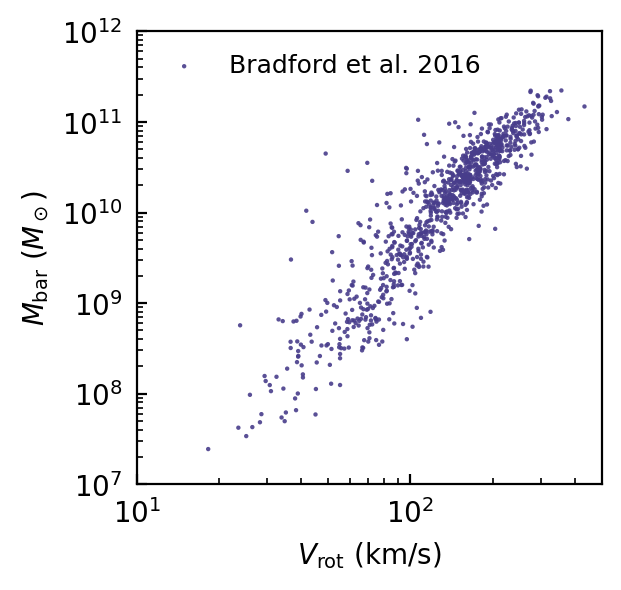

In [8]:
plt.figure(figsize=(3.,3.))
plt.xscale('log'); plt.yscale('log')
plt.xlim([10.,500.]); plt.ylim([1.e7,1.e12]) 
plt.xlabel(r'$V_{\rm rot}\rm\ (km/s)$'); plt.ylabel(r'$M_{\rm bar}\ (M_\odot)$')
plt.scatter(10**x, 10.**y,marker='.',c='darkslateblue',s=10.,alpha=0.9,edgecolor='none', label='Bradford et al. 2016')

plt.legend(frameon=False,loc='upper left', fontsize=9)
plt.show()